In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
location='/content/drive/My Drive/CS 5228 Project/'  ##Enter the location of the training data folder

Mounted at /content/drive


In [3]:
data=pd.read_csv('{}train.csv/train.csv'.format(location))
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0


Objectives of this project:
 - To understand the key factors affecting HDB resale prices
 - To build a comprehensive pricing model to determine the intrinsic price of an HDB resale flat

 This provides us with a very interesting data analytics question: how much is the real intrinsic value of a house based on objective factors such as the flat condition, accessibility of the unit, as well as other estate information

Exploratory Data Analysis

In [ ]:
print(data.shape)
data.info()

(431732, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   storey_range         431732 non-null  object 
 6   floor_area_sqm       431732 non-null  float64
 7   flat_model           431732 non-null  object 
 8   eco_category         431732 non-null  object 
 9   lease_commence_date  431732 non-null  int64  
 10  latitude             431732 non-null  float64
 11  longitude            431732 non-null  float64
 12  elevation            431732 non-null  float64
 13  subzone              431732 non-null  object 
 14  planning_area        431732 non-null  object 
 15  regi

In [ ]:
data.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price
count,431732.000000,431732.000000,431732.000000,431732.000000,431732.0,4.317320e+05
mean,96.970064,1989.421004,1.364939,103.836492,0.0,3.018196e+05
std,25.190664,10.254055,0.042829,0.073527,0.0,1.298623e+05
min,31.000000,1966.000000,1.270380,103.685228,0.0,2.970000e+04
25%,74.000000,1983.000000,1.336154,103.772439,0.0,2.052000e+05
50%,99.000000,1988.000000,1.358958,103.840160,0.0,2.839500e+05
75%,114.000000,1997.000000,1.389004,103.895779,0.0,3.735000e+05
max,280.000000,2019.000000,1.457071,103.987805,0.0,1.123200e+06


In [ ]:
categorical=data.select_dtypes(exclude=[np.number])
categorical.describe()

,month,town,flat_type,block,street_name,storey_range,flat_model,eco_category,subzone,planning_area,region
count,431732,431732,431732,431732,431732,431732,431732,431732,431732,431732,431732
unique,251,26,12,2472,1103,25,20,1,155,32,5
top,2010-07,woodlands,4 room,1,yishun ring road,04 to 06,model a,uncategorized,tampines east,woodlands,west region
freq,2926,39261,135679,1670,4392,107275,127539,431732,19557,39261,109392


In [ ]:
data.flat_type.value_counts()

4 room              135679
3 room               99886
5 room               77133
4-room               33918
executive            32724
3-room               25835
5-room               21564
2 room                3580
2-room                 942
1 room                 222
multi generation       185
1-room                  64
Name: flat_type, dtype: int64

In [ ]:
data.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
eco_category           0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
resale_price           0
dtype: int64

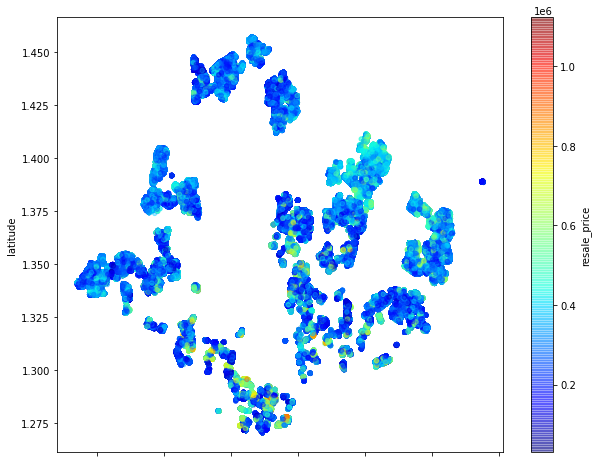

In [ ]:
ax=data.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,8),c='resale_price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)

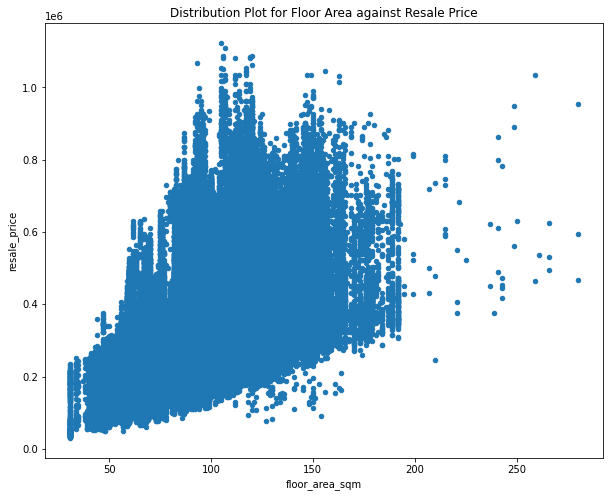

In [ ]:
ax=data.plot(kind='scatter',x='floor_area_sqm',y='resale_price',figsize=(10,8),title='Distribution Plot for Floor Area against Resale Price')

Another important visualization that will help us understanding our features would be the correlation matrix. The color between floor area and the resale price are the lightest among other combinations. It means that floor area and resale price are correlated in a positive way — higher floor area, higher resale price.

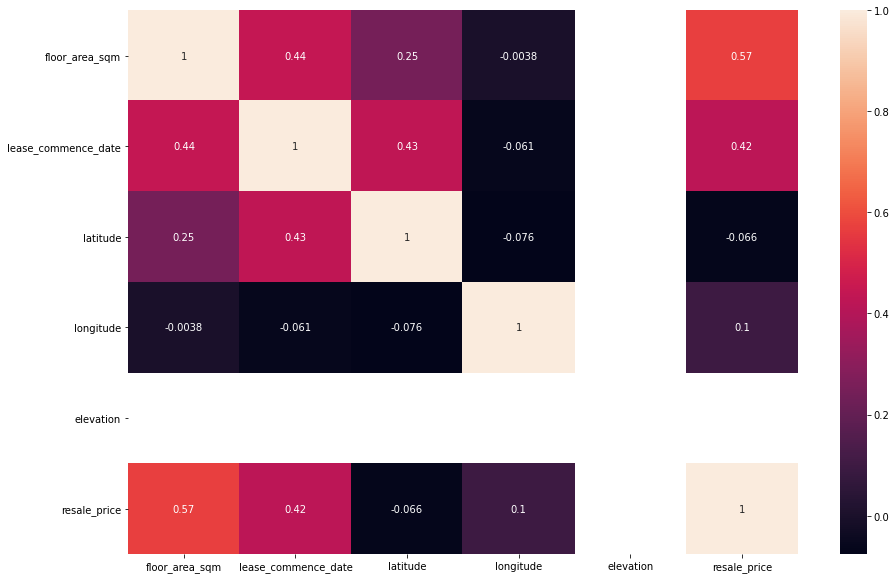

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]

corrMatrix=data.corr()

sns.heatmap(corrMatrix,annot=True)
plt.show()

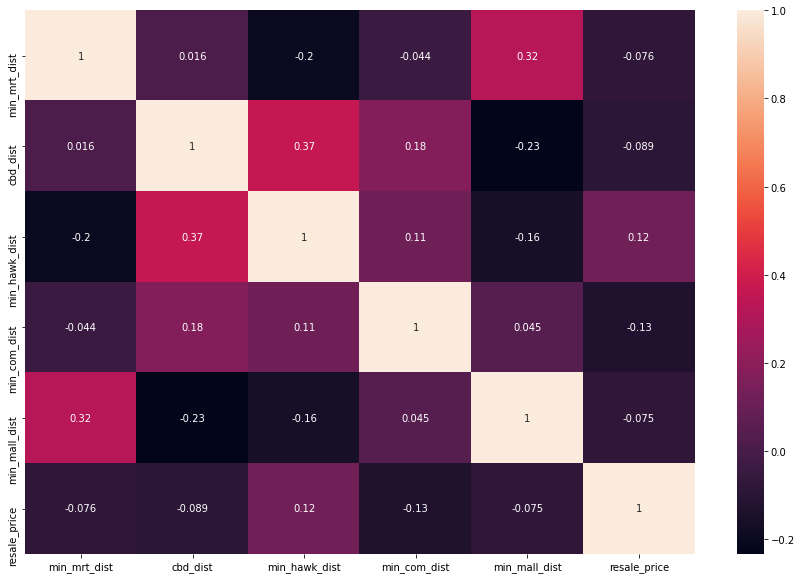

In [ ]:
import os
auxilliary_data = pd.read_csv(os.path.join(location,'final codes/clean_train.csv'))

check = auxilliary_data[['min_mrt_dist','cbd_dist','min_hawk_dist','min_com_dist','min_mall_dist','resale_price']]
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,10]

corrMatrix=check.corr()

sns.heatmap(corrMatrix,annot=True)
plt.show()

In [ ]:
data.flat_type.unique()

array(['4 room', '5-room', '5 room', '3 room', '3-room', 'executive',
       '2 room', '4-room', 'multi generation', '2-room', '1-room',
       '1 room'], dtype=object)

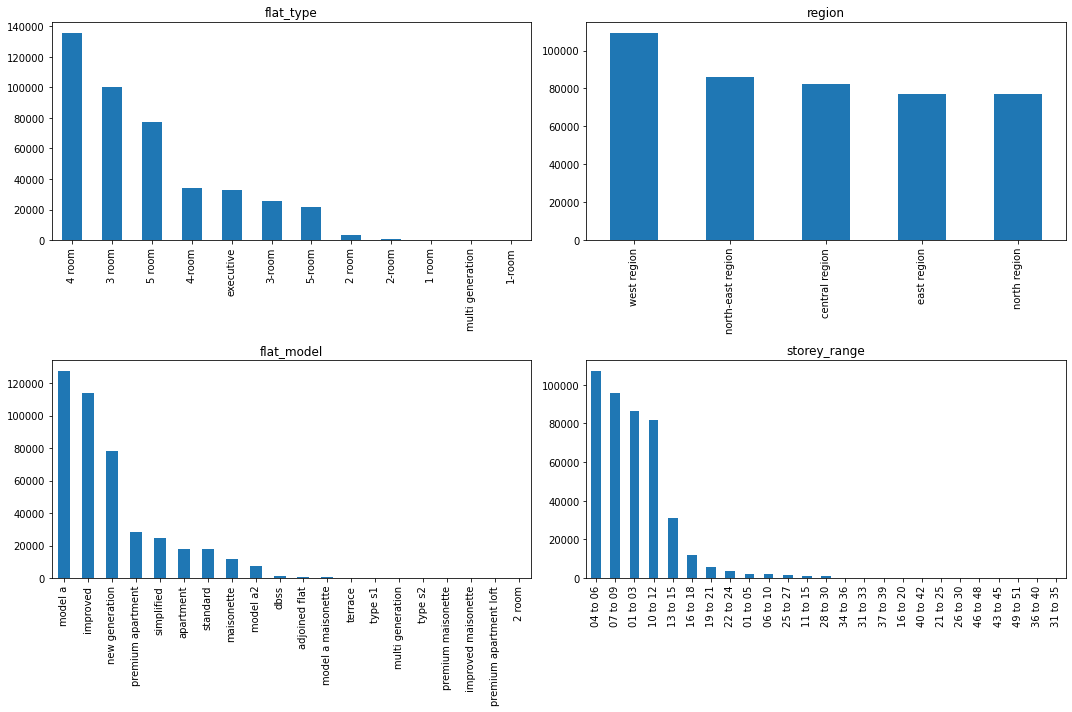

In [ ]:
variables = ['flat_type','region','flat_model','storey_range']
i=1
for var in variables:
  plt.subplot(2,2,i)
  plt.gca().set_title(var)
  data[var].value_counts().plot(kind='bar')
  i+=1
plt.tight_layout()
plt.show()

Boxplot to understand the distribution of our data. Below is a simple diagram of boxplot, and it is helpful in showing us the distribution of the target label given a particular feature. In the context of our project, boxplot can help us understand the distribution of the flat price among different flat type.

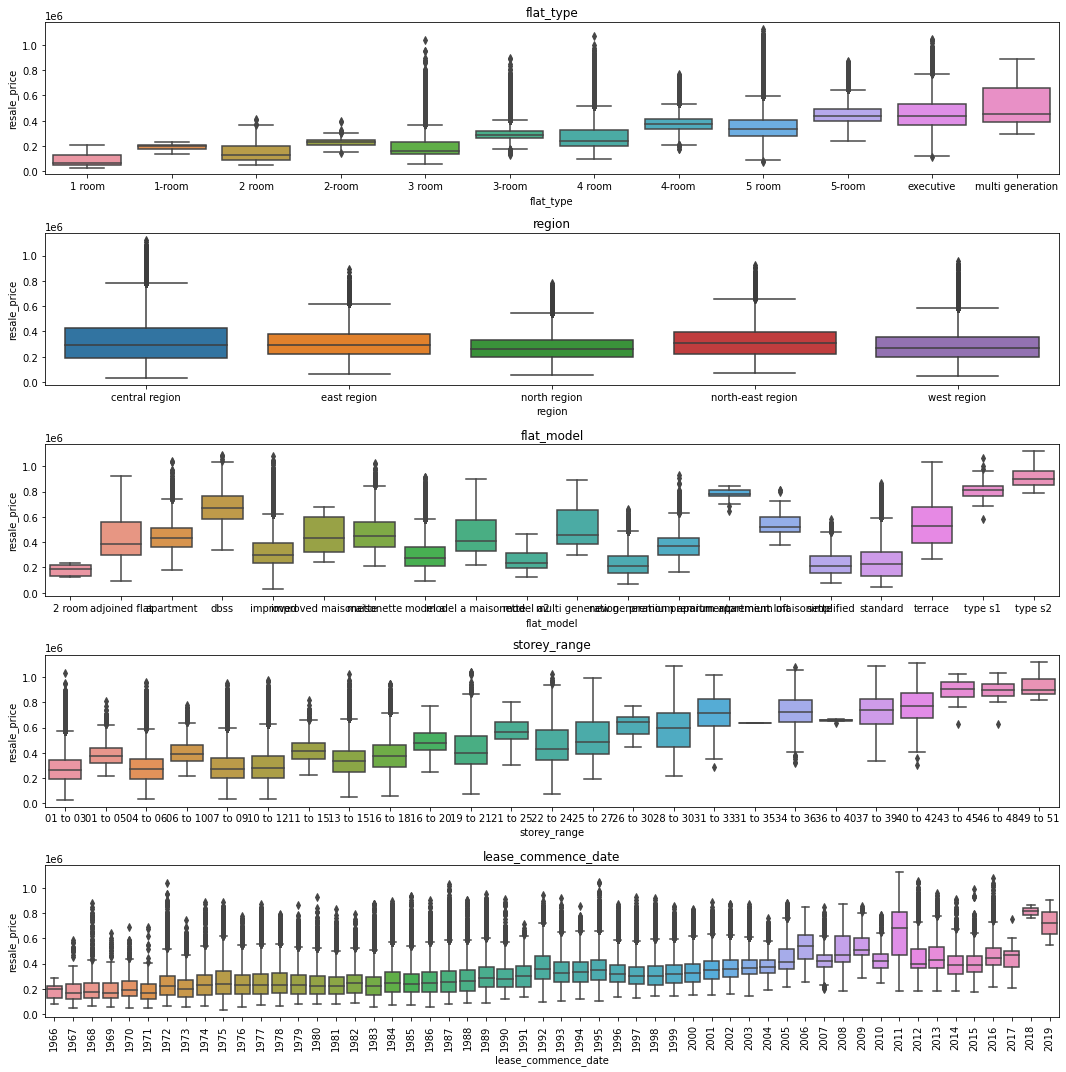

In [ ]:
#box plot overallqual/saleprice
variables = ['flat_type','region','flat_model','storey_range','lease_commence_date']
i=0
f, ax = plt.subplots(nrows=5,figsize=(15, 15))
plt.xticks(rotation=90)
for var in variables:
  df = data.sort_values(var)
  df = pd.concat([df['resale_price'], df[var]], axis=1)
  sns.boxplot(x=var, y="resale_price", data=df,ax=ax[i])
  ax[i].set_title(var)
  i+=1
plt.tight_layout()
plt.show()

In [ ]:
data.storey_range.value_counts()

04 to 06    107275
07 to 09     95732
01 to 03     86231
10 to 12     81616
13 to 15     30857
16 to 18     12140
19 to 21      5541
22 to 24      3555
01 to 05      2178
06 to 10      1985
25 to 27      1643
11 to 15       993
28 to 30       866
34 to 36       221
31 to 33       220
37 to 39       215
16 to 20       209
40 to 42       109
21 to 25        69
26 to 30        29
46 to 48        19
43 to 45        14
49 to 51         7
36 to 40         6
31 to 35         2
Name: storey_range, dtype: int64

In [ ]:
print('No of rows: {} , columns: {}'.format(data.shape[0],data.shape[1]))

No of rows: 431732 , columns: 17


### **Data Cleaning and Feature Extraction/Engineering**

**Remove duplicate rows**

In [ ]:
df_train=data.drop_duplicates(inplace=False)

In [ ]:
print('No of rows: {} , columns: {}'.format(df_train.shape[0],df_train.shape[1]))

No of rows: 431417 , columns: 17


**Remove columns eco_category and elevation**

In [ ]:
df_train.drop(['elevation','eco_category'],axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Remove hyphen (-) from flat_type values**

In [ ]:
df_train['flat_type']=df_train['flat_type'].str.replace(r'\-', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Created new column storey_mid**
The storey range features provided in the data is in a string format: 4 TO 6, 7 TO 9, which I think is sub-optimal because if your features are ordinal, you should convert the feature to number. The reason being, floor 7 is lower than floor 9, and modeling the feature as number will help the model to learn this relationship. If we leave the feature as string without any processing, the model will miss out this great information.

In [ ]:
df_train['storey_low'] = df_train['storey_range'].apply(lambda x: x.split(" ")[0]).astype('int')
df_train['storey_high'] = df_train['storey_range'].apply(lambda x: x.split(" ")[2]).astype('int')
df_train['storey_mid'] = ((df_train['storey_low']+df_train['storey_high'])/2).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_train.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price,storey_low,storey_high,storey_mid
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,pasir ris,east region,209700.0,1,3,2
1,2014-10,punggol,5 room,196B,punggol field,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,punggol,north-east region,402300.0,10,12,11
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,sengkang,north-east region,351000.0,1,3,2


**Convert Month to Year and Month columns**

In [ ]:
df_train['sale_year']=df_train['month'].apply(lambda x: x.split("-")[0]).astype(int)
df_train['sale_month']=df_train['month'].apply(lambda x: x.split("-")[1]).astype(int)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price,storey_low,storey_high,storey_mid,sale_year,sale_month
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,pasir ris,east region,209700.0,1,3,2,2001,8
1,2014-10,punggol,5 room,196B,punggol field,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,punggol,north-east region,402300.0,10,12,11,2014,10
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,sengkang,north-east region,351000.0,1,3,2,2020,9
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi north,clementi,west region,151200.0,7,9,8,2000,10
4,2013-01,bukit batok,3 room,163,bukit batok street 11,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok west,bukit batok,west region,318600.0,7,9,8,2013,1


In [ ]:
df_train[df_train['sale_year']<df_train['lease_commence_date']].describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,resale_price,sale_year,sale_month
count,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000
mean,103.615385,2006.461538,1.315159,103.821087,0.0,338226.853846,2005.307692,6.307692
std,9.206324,1.664101,0.041205,0.022171,0.0,75615.943340,1.750458,3.301126
min,95.000000,2006.000000,1.280999,103.781869,0.0,265500.000000,2004.000000,1.000000
25%,95.000000,2006.000000,1.281165,103.808472,0.0,290700.000000,2005.000000,4.000000
50%,100.000000,2006.000000,1.281569,103.808688,0.0,322200.000000,2005.000000,7.000000
75%,115.000000,2006.000000,1.364218,103.846861,0.0,349200.000000,2005.000000,9.000000
max,116.000000,2012.000000,1.365029,103.846908,0.0,554400.000000,2011.000000,11.000000


In [ ]:
df_train[df_train['sale_year']<df_train['lease_commence_date']]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,sale_year,sale_month
28408,2005-09,bukit merah,4 room,111B,depot road,10 to 12,100.0,model a,uncategorized,2006,1.281165,103.808472,0.0,depot road,bukit merah,central region,283500.0,2005,9
68514,2005-09,ang mo kio,4 room,309A,ang mo kio street 31,16 to 18,95.0,model a,uncategorized,2006,1.365029,103.845301,0.0,townsville,ang mo kio,north-east region,290700.0,2005,9
104943,2004-09,bukit merah,4 room,112A,depot road,22 to 24,100.0,model a,uncategorized,2006,1.281476,103.808148,0.0,depot road,bukit merah,central region,313200.0,2004,9
116067,2005-04,bukit merah,5 room,111B,Depot Road,22 to 24,116.0,improved,uncategorized,2006,1.281165,103.808472,0.0,depot road,bukit merah,central region,361799.1,2005,4
149176,2005-06,ang mo kio,5 room,316A,ang mo kio street 31,28 to 30,110.0,improved,uncategorized,2006,1.364766,103.846908,0.0,townsville,ang mo kio,north-east region,402750.0,2005,6
161538,2005-08,bukit merah,5 room,111A,Depot Road,22 to 24,115.0,improved,uncategorized,2006,1.281123,103.808688,0.0,depot road,bukit merah,central region,342000.0,2005,8
208817,2005-08,ang mo kio,4 room,315A,Ang Mo Kio Street 31,01 to 03,95.0,model a,uncategorized,2006,1.364218,103.846861,0.0,townsville,ang mo kio,north-east region,265500.0,2005,8
213419,2005-07,ang mo kio,4 room,315A,ang mo kio street 31,13 to 15,95.0,model a,uncategorized,2006,1.364218,103.846861,0.0,townsville,ang mo kio,north-east region,279000.0,2005,7
226850,2004-11,bukit merah,4 room,109B,depot road,25 to 27,100.0,model a,uncategorized,2006,1.280999,103.809225,0.0,depot road,bukit merah,central region,322200.0,2004,11
303887,2005-07,ang mo kio,4 room,316A,ang mo kio street 31,25 to 27,95.0,model a,uncategorized,2006,1.364766,103.846908,0.0,townsville,ang mo kio,north-east region,292500.0,2005,7


**Create new columns : bedrooms and bathroom from flat_type**
Bedroom, Bathroom info used from : https://www.hdb.gov.sg/residential/buying-a-flat/new/types-of-flats

In [ ]:
bedrooms = {'4 room': 3, '5 room': 3, '3 room': 2, 'executive': 3, '2 room': 1,
       'multi generation':4, '1 room':1}
bathrooms={'4 room': 2, '5 room': 2, '3 room': 2, 'executive': 2, '2 room': 1,
       'multi generation':3, '1 room':1}

df_train['bedrooms']= df_train['flat_type'].map(bedrooms) #pd.Series(bedrooms[x] for x in df_train['flat_type'])
df_train['bathrooms']=df_train['flat_type'].map(bathrooms) #pd.Series(bathrooms[x] for x in df_train['flat_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Created a new column - remaining_lease_period**

In [ ]:
def cal_rem_lease(x):
  return 99-(x['sale_year']-x['lease_commence_date'])

df_train['remaining_lease_period']=df_train.apply(cal_rem_lease, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,latitude,longitude,subzone,planning_area,region,resale_price,storey_low,storey_high,storey_mid,sale_year,sale_month,bedrooms,bathrooms,remaining_lease_period
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,1989,1.369008,103.958697,pasir ris drive,pasir ris,east region,209700.0,1,3,2,2001,8,3,2,87
1,2014-10,punggol,5 room,196B,punggol field,10 to 12,110.0,improved,2003,1.399007,103.906991,punggol field,punggol,north-east region,402300.0,10,12,11,2014,10,3,2,88
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,2004,1.388348,103.873815,fernvale,sengkang,north-east region,351000.0,1,3,2,2020,9,3,2,83
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,1980,1.318493,103.766702,clementi north,clementi,west region,151200.0,7,9,8,2000,10,2,2,79
4,2013-01,bukit batok,3 room,163,bukit batok street 11,07 to 09,73.0,model a,1985,1.348149,103.742658,bukit batok west,bukit batok,west region,318600.0,7,9,8,2013,1,2,2,71


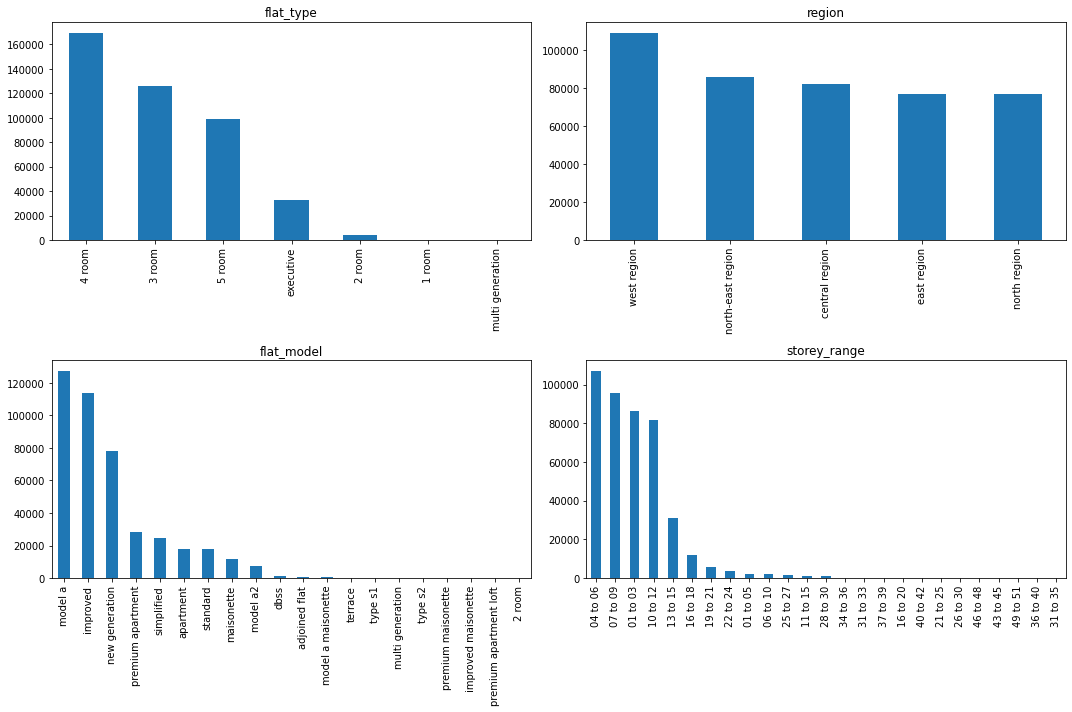

In [ ]:
variables = ['flat_type','region','flat_model','storey_range']
i=1
for var in variables:
  plt.subplot(2,2,i)
  plt.gca().set_title(var)
  df_train[var].value_counts().plot(kind='bar')
  i+=1
plt.tight_layout()
plt.show()

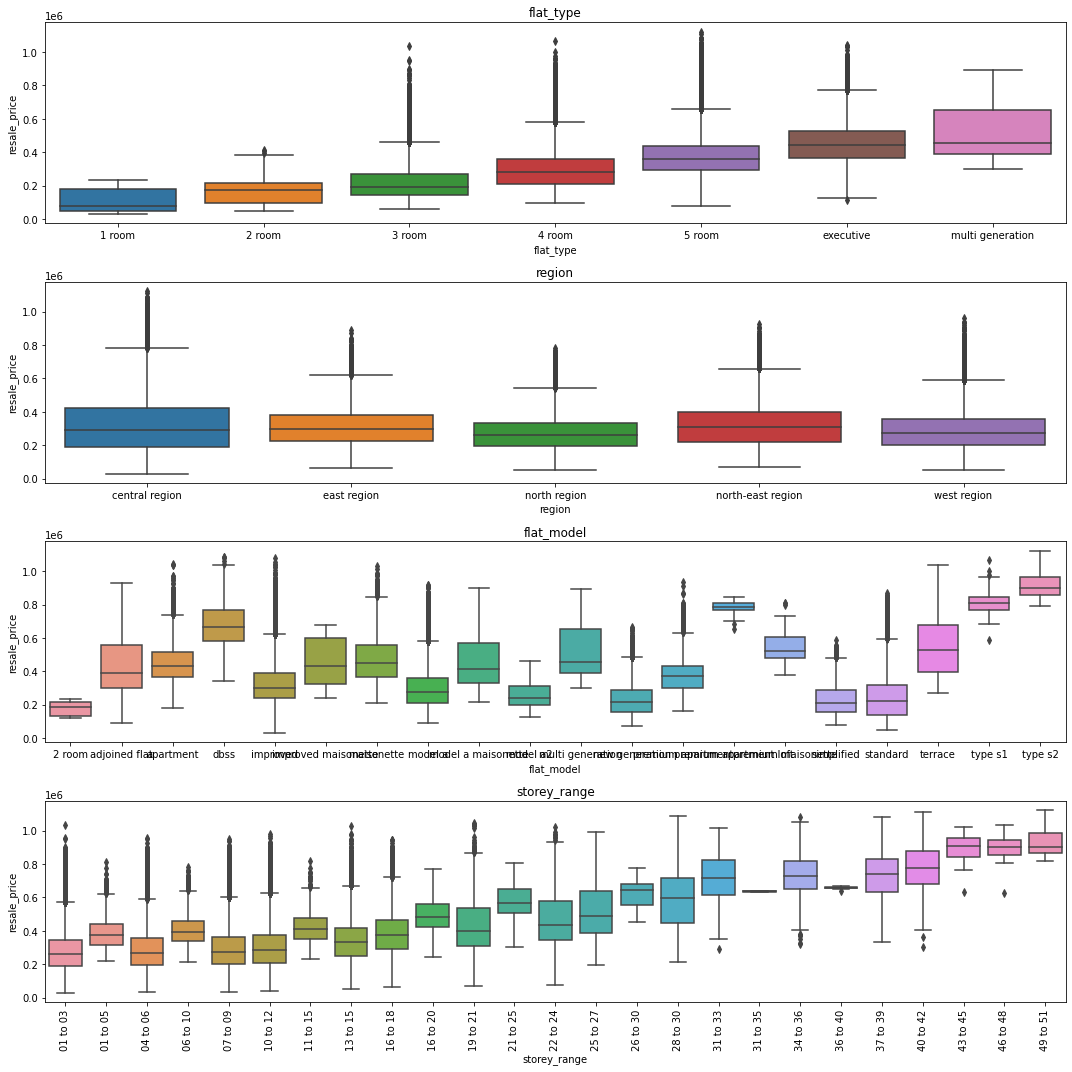

In [ ]:
#box plot overallqual/saleprice
variables = ['flat_type','region','flat_model','storey_range']
i=0
f, ax = plt.subplots(nrows=len(variables),figsize=(15, 15))
plt.xticks(rotation=90)
for var in variables:
  df = df_train.sort_values(var)
  df = pd.concat([df['resale_price'], df[var]], axis=1)
  sns.boxplot(x=var, y="resale_price", data=df,ax=ax[i])
  ax[i].set_title(var)
  i+=1
plt.tight_layout()
plt.show()

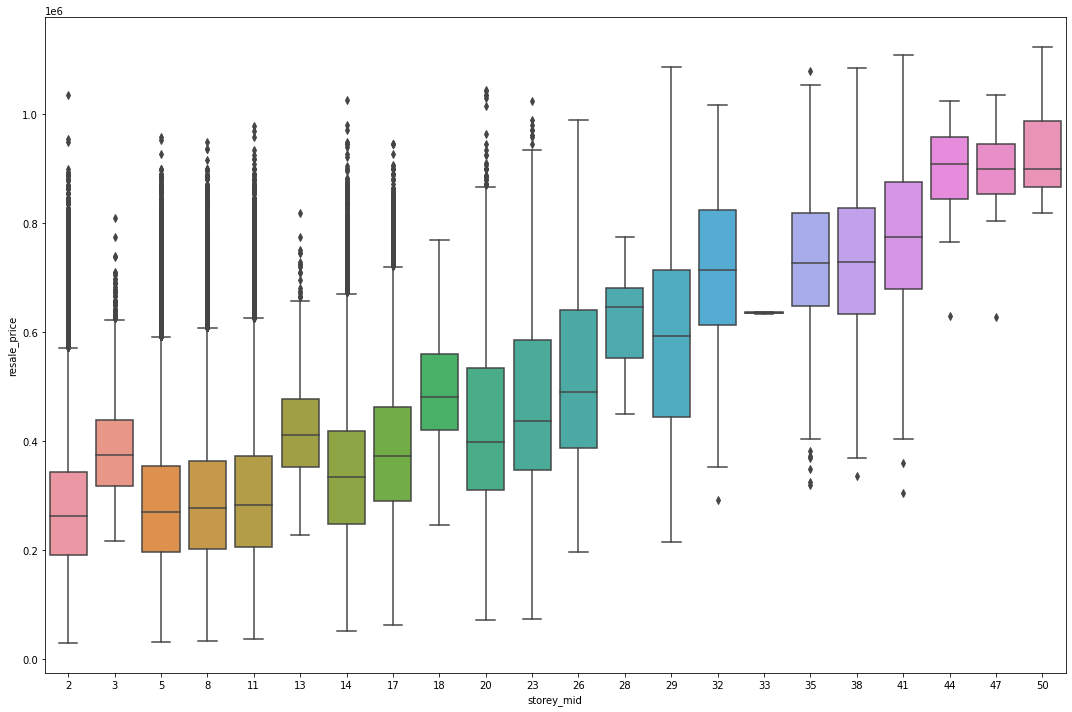

In [ ]:
df = df_train.sort_values('storey_mid')
df = pd.concat([df['resale_price'], df['storey_mid']], axis=1)
sns.boxplot(x='storey_mid', y="resale_price", data=df)
plt.tight_layout()
plt.show()

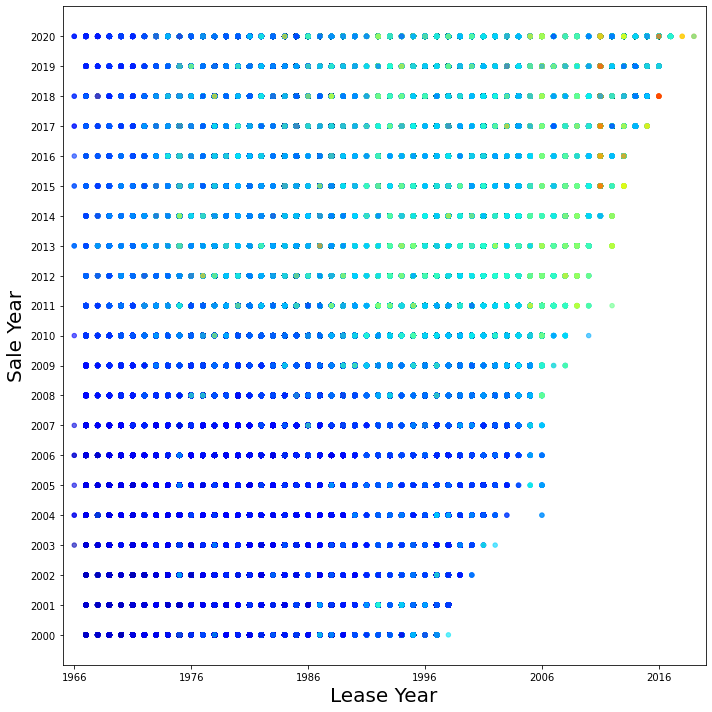

In [ ]:
#df_train.plot.scatter(x='lease_commence_date', y='sale_year',s='resale_price')
ax=df_train.plot(kind='scatter',x='lease_commence_date',y='sale_year',figsize=(10,10),c='resale_price',cmap=plt.get_cmap('jet'),colorbar=False,alpha=0.6)
# add axis labels
ax.set_ylabel("Sale Year", fontsize=20)
ax.set_xlabel("Lease Year", fontsize=20)
# set the min/max axis values - these must be the same as above
ax.set_ylim(df_train['sale_year'].min()-1, df_train['sale_year'].max()+1)
ax.set_xlim(df_train['lease_commence_date'].min()-1, df_train['lease_commence_date'].max()+1)
plt.yticks(np.array(df_train['sale_year'].unique()))
plt.xticks(np.array(np.arange(df_train['lease_commence_date'].min(), df_train['lease_commence_date'].max(),10)))
plt.tight_layout()
plt.show()

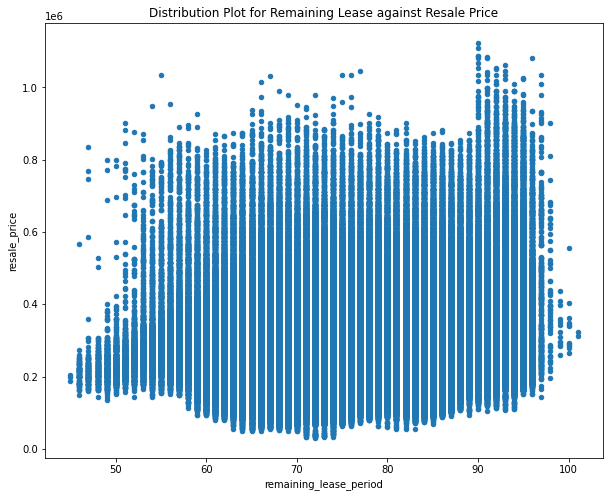

In [ ]:
ax=df_train.plot(kind='scatter',x='remaining_lease_period',y='resale_price',figsize=(10,8),title='Distribution Plot for Remaining Lease against Resale Price')

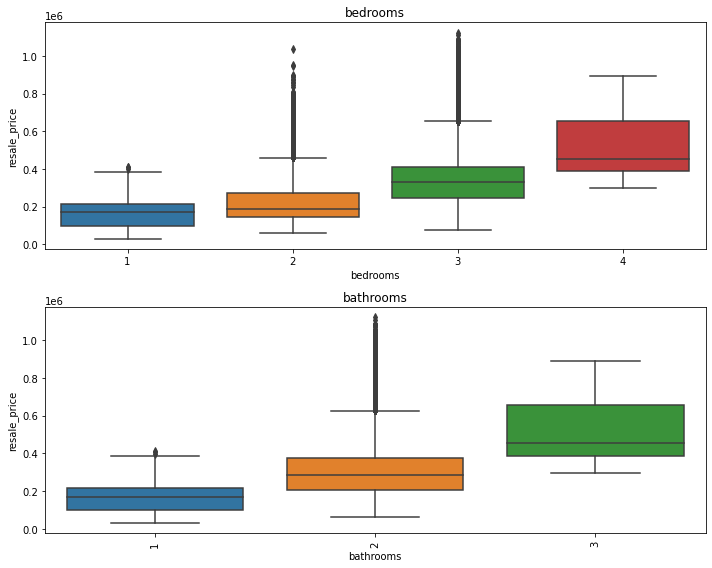

In [ ]:
#box plot overallqual/saleprice
variables = ['bedrooms','bathrooms']
i=0
f, ax = plt.subplots(nrows=len(variables),figsize=(10, 8))
plt.xticks(rotation=90)
for var in variables:
  df = df_train.sort_values(var)
  df = pd.concat([df['resale_price'], df[var]], axis=1)
  sns.boxplot(x=var, y="resale_price", data=df,ax=ax[i])
  ax[i].set_title(var)
  i+=1
plt.tight_layout()
plt.show()